## Joshua Lin
# Project 1 Report: Lyft Bay Wheels Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Motivating Questions

### 1. What are the 5 most popular 'commuter trips'?

Based on my analysis, I found that the 5 most popular commuter trips are as follows:
* San Francisco Caltrain 2 (330 Townsend) to Townsend at 7th
* Harry Bridges Plaza (Ferry Building) to Embarcadero at Sansome
* 2nd at Townsend to Harry Bridges Plaza (Ferry Building)
* Townsend at 7th San Francisco Caltrain 2 (330 Townsend)
* Embarcadero at Sansome to Steuart at Market

Out of all these 5 trips, however, it looks like many bikers bike from the SF Caltrain 2 station to Townsend at 7th and back many times throughout the week, making it <b> the most popular <b> commuter round trip.

#### Evidence: What makes a trip a 'popular commuter trip'?

To find the <b> top 5 </b> commuter trips, I looked at the number of trips that occurred where the start and end stations were different, as well as trips that occurred only on weekdays. I only looked at trips with different start and end stations, since these trips would likely be ones where individuals are biking from home or a CalTrain or BART station to a station by their company office. Meanwhile, I only considered weekdays, because I wanted to look at trips that only occurred during a typical work week. Trips on weekends would likely be for leisure and errands rather than commutes.

In [2]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(*) AS number_of_trips FROM `bike_trip_data.trip_start_end_times` WHERE start_station_name <> end_station_name AND dow_weekday = "Weekday" GROUP BY start_station_name, end_station_name HAVING number_of_trips > 100 ORDER BY 3 desc, 1, 2' > commuter_trips.csv

Waiting on bqjob_r32738e4174239c71_00000174dd23c6f8_1 ... (0s) Current status: DONE   


In [3]:
commuter_trips = pd.read_csv('commuter_trips.csv')
top_five_trips = commuter_trips.head()
top_five_trips

,start_station_name,end_station_name,number_of_trips
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8048
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,7072
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7043
3,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6471
4,Embarcadero at Sansome,Steuart at Market,6419


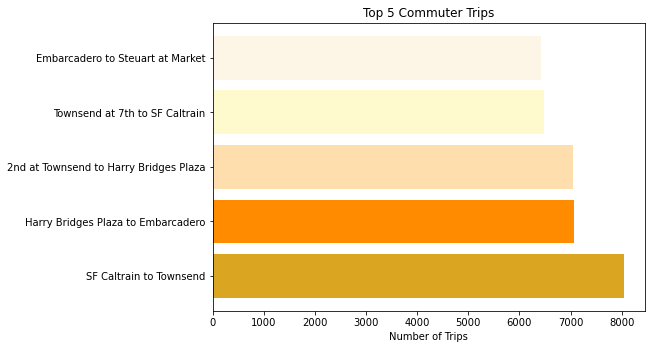

In [4]:
trips_plot = plt.figure()
ax = trips_plot.add_axes([0,0,1,1])
trips = ['SF Caltrain to Townsend', 'Harry Bridges Plaza to Embarcadero', '2nd at Townsend to Harry Bridges Plaza',
         'Townsend at 7th to SF Caltrain', 'Embarcadero to Steuart at Market']
trip_num = top_five_trips.number_of_trips
ax.barh(trips,trip_num, color=['goldenrod', 'darkorange', 'navajowhite', 'lemonchiffon', 'oldlace'])
plt.xlabel('Number of Trips')
plt.title('Top 5 Commuter Trips')
plt.show()

### 2. What deals should Lyft offer and promote?

Currently, Lyft has seen a relatively consistent growth in number of subscribers as seen below. As of August 2016, there are <b> 4065 Bay Wheels customers and 26290 subscribers </b> in comparison to 1173 customers and 929 subscribers in August 2013.

In [5]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 ' SELECT * FROM `bike_trip_data.trip_subscriber_month_year`' > subscriber_growth.csv

Waiting on bqjob_r63b1603a65677a82_00000174dd23edf4_1 ... (0s) Current status: DONE   


In [6]:
subscriber_growth = pd.read_csv('subscriber_growth.csv')
subscriber_growth['year-month'] = pd.to_datetime(subscriber_growth['start_date']).dt.to_period('M')
subscriber_growth.head()

,trip_id,subscriber_type,start_date,month_int,month_str,year,year-month
0,4069,Subscriber,2013-08-29 09:08:00,8,August,2013,2013-08
1,4073,Subscriber,2013-08-29 09:24:00,8,August,2013,2013-08
2,4075,Subscriber,2013-08-29 09:24:00,8,August,2013,2013-08
3,4074,Subscriber,2013-08-29 09:24:00,8,August,2013,2013-08
4,4076,Subscriber,2013-08-29 09:25:00,8,August,2013,2013-08


In [7]:
sg_pivot = subscriber_growth.pivot_table(index='year-month', columns='subscriber_type', values='trip_id', aggfunc='count')
sg_pivot.head(1)

subscriber_type,Customer,Subscriber
year-month,,
2013-08,1173,929


In [8]:
sg_pivot.tail(1)

subscriber_type,Customer,Subscriber
year-month,,
2016-08,4065,26290


<AxesSubplot:xlabel='year-month'>

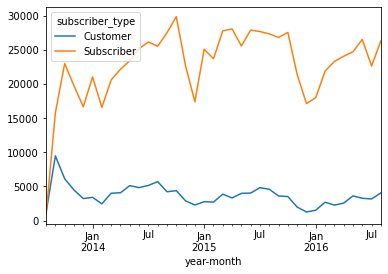

In [9]:
sg_pivot.plot()

In order to convert as much of the remaining 4065 customers into Bay Wheels subscribers, here are the following recommendations I've made to Bay Wheels memberships and offers: increase corporate, monthly, annual membership promotions; offer a weekend pass; and provide trial runs.

#### Offer #1: Increase Corporate, Monthly, Annual Membership Promotions

To increase revenue from the Bay Wheels system, I suggest <b> increased marketing and partnerships with corporations </b> whose offices are near the top 5 most popular routes discussed earlier (see above Question 1), as their workers likely often make these commutes. We can also <b> increase promotions of monthly and annual passes for commuters </b> whose employers don't currently subscribe to corporate memberships. By increasing the number of corporate, monthly, and annual memberships, we can further scale up the number of subscribers, greatly solidifying Lyft Bay Wheels presence in San Francisco. In addition, we can also expand the number of bikes and docks offered at these stations to ensure that commuters can make these trips.

#### Offer #2: A Weekend Pass

Based on my analysis, I found that on average, <b> weekend trips last about 41.70 minutes </b>. Since daily passes only cover rides that last 30 minutes or less, Lyft can potentially take advantage of the opportunity to offer special weekend passes that allow customers to go on longer biking trips around SF on their days off.

In [10]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT dow_weekday, avg(duration_minutes) as avg_duration_minutes FROM `bike_trip_data.duration_start_datetime` GROUP BY dow_weekday' > avg_duration_minutes.csv

Waiting on bqjob_r7b4456c3b02cccf4_00000174dd2649ff_1 ... (0s) Current status: DONE   


In [11]:
avg_duration_minutes = pd.read_csv('avg_duration_minutes.csv')
avg_duration_minutes

,dow_weekday,avg_duration_minutes
0,Weekday,13.825866
1,Weekend,41.707668


By creating a weekend pass, Lyft can also increase the number of trips that occur on the weekends. Currently, there are much fewer trips that occur on Saturdays and Sundays.

In [12]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT dow_int, dow_str, count(*) as num_trips FROM `bike_trip_data.trip_start_end_times` group by dow_int, dow_str order by dow_int' > num_trips_dow.csv

Waiting on bqjob_r3c4b6e3b477ee783_00000174dd265bfa_1 ... (0s) Current status: DONE   


In [13]:
num_trips_dow = pd.read_csv('num_trips_dow.csv')
num_trips_dow

,dow_int,dow_str,num_trips
0,1,Sunday,51375
1,2,Monday,169937
2,3,Tuesday,184405
3,4,Wednesday,180767
4,5,Thursday,176908
5,6,Friday,159977
6,7,Saturday,60279


In [14]:
total_trips = sum(num_trips_dow.num_trips)
weekend_percent = ((num_trips_dow.num_trips[0] + num_trips_dow.num_trips[6])/total_trips)*100
print("In total, there are %s total trips." % (total_trips))
print("Weekend trips only make up {d}% of the total amount of trips.".format(d = round(weekend_percent,2)))

In total, there are 983648 total trips.
Weekend trips only make up 11.35% of the total amount of trips.


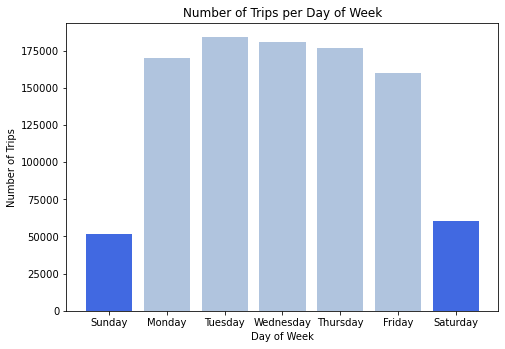

In [15]:
num_trips_dow_plot = plt.figure()
ax = num_trips_dow_plot.add_axes([0,0,1,1])
day_of_week = num_trips_dow.dow_str
num_trips = num_trips_dow.num_trips
ax.bar(day_of_week,num_trips, color=['royalblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue',
                                     'lightsteelblue', 'royalblue'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day of Week')
plt.show()

While weekend trips are only 11.35% of total trips in the entire dataset, since trips last longer on the weekends, offering weekend passes <b> can increase the number of weekend trips </b>. In this way, Lyft Bay Wheels can capitalize on the number of bikes unused on the weekends by increasing trips, and thus, increasing revenue gained from membership offers.

#### Offer #3: Trial Run

Lyft should also consider a free trial period for customers to try using the bikes. Currently, there are <b> 180079 trips that last less than 5 minutes </b>, or 300 seconds (about 18.31% of all trips, based on the answer to the first query in Part 1).

In [16]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT count(duration_sec) as num_trips FROM `bigquery-public-data.san_francisco.bikeshare_trips` WHERE duration_sec <= 300' > trips_less_300.csv

Waiting on bqjob_rdf5f5dbaaec0eb6_00000174dd268252_1 ... (0s) Current status: DONE   


In [17]:
trips_less_300 = pd.read_csv('trips_less_300.csv')
trips_less_300

,num_trips
0,180079


In [18]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=1000000 'SELECT *, CASE WHEN duration_minutes <= 5 THEN "Very Short" WHEN duration_minutes >= 6 and duration_minutes <= 20 THEN "Average" WHEN duration_minutes >= 21 and duration_minutes <= 60 THEN "Long" ELSE "Very Long" END AS trip_length FROM `bike_trip_data.duration_sec_min`' > duration.csv

Waiting on bqjob_r4e3f725853a0cdfd_00000174dd26ace2_1 ... (0s) Current status: DONE   


In [19]:
duration = pd.read_csv('duration.csv')
duration['duration_min'] = round(duration['duration_sec']/60, 2)
duration = duration.pivot_table(index='trip_length', aggfunc='count')
duration

,duration_min,duration_minutes,duration_sec,trip_id
trip_length,,,,
Average,680939,680939,680939,680939
Long,54422,54422,54422,54422
Very Long,27913,27913,27913,27913
Very Short,220374,220374,220374,220374


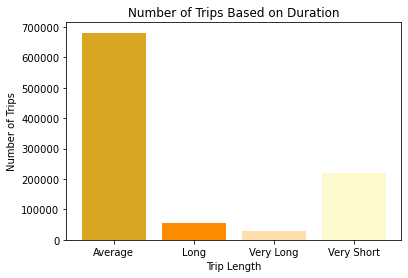

In [20]:
trip_length = ['Average', 'Long', 'Very Long', 'Very Short']
plt.bar(trip_length, duration.trip_id, color = ['goldenrod', 'darkorange', 'navajowhite', 'lemonchiffon'])
plt.xlabel("Trip Length")
plt.ylabel("Number of Trips")
plt.title("Number of Trips Based on Duration")
plt.show()

We can see here that the number of trips less than or equal to 5 minutes is almost 20% of the total number of trips. These trips are likely very short, since bike users might be testing the bikes out or simply realized they didn't need to use a bike. Since potential users might simply want to try using a Lyft bike, to incentivize more of them to give Bay Wheels a try, we can offer a trial ride so that the cost of using a bike is less intimidating.

<b>Note</b>: Due to rounding while creating intermediate views to make data analysis easier, the numbers are slightly different for the number of trips based on trip duration in the above graph compared to the previous finding where the number of trips less than or equal to 5 minutes was 180079. Here, the number is closer to 200000. However, the distribution of trip length is very similar; very short trips still only account for a fifth of total trips similar to the above statement.

## Additional Recommendations

Aside from improving and creating new deals for bike memberships and passes, there are other suggestions I'd like to make based off my data analysis.

### Increase Popular Station Bike Availability

I recommend that Lyft increase bike availability for the following stations due to frequent scarcity: station 73 Grant Avenue at Columbus Avenue, station 71 Powell at Post (Union Square), station 55 Temporary Transbay Terminal (Howard at Beale), station 56 Beale at Market, station 34 Palo Alto Caltrain Station, station 13 St. James Park, station 90 Townsend at 7th, and station 49 Spear at Folsom. These stations are frequently visited by both customers and subscribers on weekdays and weekends as seen below.

In [21]:
! bq query --use_legacy_sql=FALSE --format=csv  'SELECT lowest5_wkday.num_times_scarce, stations.name, lowest5_wkday.station_id as lowest5_wkday_station_id, stations.station_id as stations_station_id FROM `bike_trip_data.lowest5_available_wkday` lowest5_wkday INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations ON lowest5_wkday.station_id = stations.station_id' > lowest5_wkday.csv

Waiting on bqjob_r4b109f20ab01d2cf_00000174dd2bac30_1 ... (0s) Current status: DONE   


In [22]:
lowest5_wkday = pd.read_csv('lowest5_wkday.csv')
lowest5_wkday[['num_times_scarce', 'name', 'stations_station_id']]

,num_times_scarce,name,stations_station_id
0,3719,Grant Avenue at Columbus Avenue,73
1,548,Temporary Transbay Terminal (Howard at Beale),55
2,456,St James Park,13
3,90,Townsend at 7th,65
4,70,Spear at Folsom,49


In [23]:
! bq query --use_legacy_sql=FALSE --format=csv '  SELECT lowest5_wkend.num_times_scarce, stations.name, lowest5_wkend.station_id as lowest5_wkend_station_id, stations.station_id as stations_station_id FROM `bike_trip_data.lowest5_available_wkend` lowest5_wkend INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations ON lowest5_wkend.station_id = stations.station_id' > lowest5_wkend.csv

Waiting on bqjob_r143e3850a0651bff_00000174dd2bbb70_1 ... (0s) Current status: DONE   


In [24]:
lowest5_wkend = pd.read_csv('lowest5_wkend.csv')
lowest5_wkend[['num_times_scarce', 'name', 'stations_station_id']]

,num_times_scarce,name,stations_station_id
0,2483,Grant Avenue at Columbus Avenue,73
1,1074,Powell at Post (Union Square),71
2,143,Temporary Transbay Terminal (Howard at Beale),55
3,90,Beale at Market,56
4,81,Palo Alto Caltrain Station,34


To measure scarcity, I looked at the number of occurrences where the number of bikes and docks available were less than 4. This would be an adequate measure, since if there are little to no bikes then that means users are frequently coming to the station and checking out bikes. If there are no docks available, then docks are either already being used or simply unavailable. As a result, Lyft should consider increasing the number of bikes and docks available at these stations, since they are often scarce, especially the station 73.

<b> Note </b>: To find stations that frequently had scarcity of bikes and docks, I did not include station 87, because every time the station appeared in the dataset, it had 0 bikes and 0 docks, which could be due to an error in data collection.

### Decrease Unused Bikes & Docks

On the other side of the spectrum, there are stations that frequently have more than 20 bikes and docks available altogether.

In [25]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT plenty_wkday.num_times_plenty, stations.name, plenty_wkday.station_id as plenty_wkday_station_id, stations.station_id as stations_station_id FROM `bike_trip_data.station_wkday_high_availability` plenty_wkday INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations ON plenty_wkday.station_id = stations.station_id order by num_times_plenty desc' > highest_wkday.csv

Waiting on bqjob_r79efd893efe3b6b6_00000174dd2bd00e_1 ... (0s) Current status: DONE   


In [26]:
highest_wkday = pd.read_csv('highest_wkday.csv')
highest_wkday[['num_times_plenty', 'name', 'stations_station_id']].head(7)

,num_times_plenty,name,stations_station_id
0,1114960,Mountain View Caltrain Station,28
1,1114960,San Antonio Caltrain Station,29
2,1114908,Market at 10th,67
3,1114892,Golden Gate at Polk,59
4,1114800,Market at Sansome,77
5,1114789,2nd at Townsend,61
6,1114715,San Jose Diridon Caltrain Station,2


In [27]:
! bq query --use_legacy_sql=FALSE --format=csv '  SELECT plenty_wkend.num_times_plenty, stations.name, plenty_wkend.station_id as plenty_wkend_station_id, stations.station_id as stations_station_id FROM `bike_trip_data.station_wkend_high_availability` plenty_wkend INNER JOIN `bigquery-public-data.san_francisco.bikeshare_stations` stations ON plenty_wkend.station_id = stations.station_id order by num_times_plenty desc' > highest_wkend.csv

Waiting on bqjob_r1ec3267c7e348316_00000174dd2bdf4d_1 ... (0s) Current status: DONE   


In [28]:
highest_wkend = pd.read_csv('highest_wkend.csv')
highest_wkend[['num_times_plenty', 'name', 'stations_station_id']].head(7)

,num_times_plenty,name,stations_station_id
0,444639,San Jose Diridon Caltrain Station,2
1,444637,Mountain View Caltrain Station,28
2,444637,Golden Gate at Polk,59
3,444637,San Francisco Caltrain 2 (330 Townsend),69
4,444637,2nd at Townsend,61
5,444634,Civic Center BART (7th at Market),72
6,444634,Market at Sansome,77


Disregarding the Caltrain stations outside of SF as well as the station at SF Caltrain 2 and 2nd at Townsend (since these stations are part of the top 5 popular commuter routes), stations 67, 59, 77, 61, 72 often have a high number of bikes available. I separated availability between weekdays and weekends, since certain stations may be more or less popular depending on what part of the week it is. However, stations 59 and 77 appear to have plenty of bikes available during both weekdays and weekends. Bikes and docks can be shifted to the more popular stations as listed above, or they can simply be removed to save maintence fees and other costs Lyft may incur.

## Conclusion

In summary, based on the top 5 most popular commuter trips as well as data presented here, I suggest the Lyft consider increasing promotions of corporate, monthly, and annual memberships to capture potential revenue from those who use Bay Wheels to commute. In addition, Lyft should also consider adding a Weekend Pass to capitalize on customers and subscribers who take longer weekend rides as well as a Trial Run offer to incentivize more potentialc onsumers to try out Bay Wheels.

## Appendix: Code for Saved Views/Tables

### Saved Table: bike_trip_data.trip_start_end_times

In [ ]:
SELECT start_station_name, start_date,
       EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str,
     end_date, end_station_name,
       EXTRACT(DAYOFWEEK FROM end_date) AS end_dow_int,
       CASE EXTRACT(DAYOFWEEK FROM end_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS end_dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM end_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS end_dow_weekday,
       EXTRACT(HOUR FROM end_date) AS end_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM end_date) <= 5  OR EXTRACT(HOUR FROM end_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM end_date) >= 6 and EXTRACT(HOUR FROM end_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM end_date) >= 9 and EXTRACT(HOUR FROM end_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM end_date) >= 11 and EXTRACT(HOUR FROM end_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM end_date) >= 14 and EXTRACT(HOUR FROM end_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM end_date) >= 17 and EXTRACT(HOUR FROM end_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM end_date) >= 20 and EXTRACT(HOUR FROM end_date) <= 22 THEN "Evening"
           END AS end_hour_str,
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
ORDER BY start_date ASC

### Saved view: bike_trip_data.duration_start_datetime

In [ ]:
SELECT duration_sec,
       CAST(ROUND(duration_sec / 60.0) AS INT64) AS duration_minutes,
       CAST(ROUND(duration_sec / 3600.0) AS INT64) AS duration_hours_rounded,
       ROUND(duration_sec / 3600.0, 1) AS duration_hours_tenths, 
   start_date,
       EXTRACT(DAYOFWEEK FROM start_date) AS dow_int,
       CASE EXTRACT(DAYOFWEEK FROM start_date)
           WHEN 1 THEN "Sunday"
           WHEN 2 THEN "Monday"
           WHEN 3 THEN "Tuesday"
           WHEN 4 THEN "Wednesday"
           WHEN 5 THEN "Thursday"
           WHEN 6 THEN "Friday"
           WHEN 7 THEN "Saturday"
           END AS dow_str,
       CASE 
           WHEN EXTRACT(DAYOFWEEK FROM start_date) IN (1, 7) THEN "Weekend"
           ELSE "Weekday"
           END AS dow_weekday,
       EXTRACT(HOUR FROM start_date) AS start_hour,
       CASE 
           WHEN EXTRACT(HOUR FROM start_date) <= 5  OR EXTRACT(HOUR FROM start_date) >= 23 THEN "Nightime"
           WHEN EXTRACT(HOUR FROM start_date) >= 6 and EXTRACT(HOUR FROM start_date) <= 8 THEN "Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 9 and EXTRACT(HOUR FROM start_date) <= 10 THEN "Mid Morning"
           WHEN EXTRACT(HOUR FROM start_date) >= 11 and EXTRACT(HOUR FROM start_date) <= 13 THEN "Mid Day"
           WHEN EXTRACT(HOUR FROM start_date) >= 14 and EXTRACT(HOUR FROM start_date) <= 16 THEN "Early Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 17 and EXTRACT(HOUR FROM start_date) <= 19 THEN "Afternoon"
           WHEN EXTRACT(HOUR FROM start_date) >= 20 and EXTRACT(HOUR FROM start_date) <= 22 THEN "Evening"
           END AS start_hour_str
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
ORDER BY start_date ASC

### Saved table: bike_trip_data.trip_subscriber_month_year

In [ ]:
SELECT trip_id, subscriber_type, start_date,
       EXTRACT(MONTH FROM start_date) AS month_int,
       CASE EXTRACT(MONTH FROM start_date)
           WHEN 01 THEN "January"
           WHEN 02 THEN "February"
           WHEN 03 THEN "March"
           WHEN 04 THEN "April"
           WHEN 05 THEN "May"
           WHEN 06 THEN "June"
           WHEN 07 THEN "July"
           WHEN 08 THEN "August"
           WHEN 09 THEN "September"
           WHEN 10 THEN "October"
           WHEN 11 THEN "November"
           WHEN 12 THEN "December"
           END AS month_str,
       EXTRACT(YEAR FROM start_date) as year
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
ORDER BY start_date ASC

### Saved view: duration_sec_min

In [ ]:
SELECT trip_id, duration_sec,
  CAST(ROUND(duration_sec / 60.0) AS INT64) AS duration_minutes,
FROM `bigquery-public-data.san_francisco.bikeshare_trips`

### Saved view: bike_trip_data.station_status_no87

In [ ]:
  SELECT *
  FROM `bike_trip_data.station_status_datetime`
  where not station_id = 87 #Save as view "bike_trip_data.station_status_no87"

### Saved view: bike_trip_data.station_status_availability

In [ ]:
  SELECT *, (bikes_available + docks_available) as total_bikes_available
  FROM `bike_trip_data.station_status_no87`
  order by total_bikes_available, station_id #Save as table "bike_trip_data.station_status_availability"

### Saved view: bike_trip_data.lowest5_available_wkday

In [ ]:
  SELECT station_id, count(*) as num_times_scarce
  FROM `bike_trip_data.station_status_availability`
  WHERE dow_weekday = 'Weekday' and total_bikes_available <= 4
  GROUP BY station_id
  ORDER BY num_times_scarce desc, station_id
  LIMIT 5 #Save as view "bike_trip_data.lowest5_available_wkday"

### Saved view: bike_trip_data.lowest5_available_wkend

In [ ]:
  SELECT station_id, count(*) as num_times_scarce
  FROM `bike_trip_data.station_status_availability`
  WHERE dow_weekday = 'Weekend' and total_bikes_available <= 4
  GROUP BY station_id
  ORDER BY num_times_scarce desc, station_id
  LIMIT 5 #Save as view "bike_trip_data.lowest5_available_wkend"

### Saved view: bike_trip_data.station_wkday_high_availability

In [ ]:
  SELECT station_id, count(*) as num_times_plenty
  FROM `bike_trip_data.station_status_availability`
  where dow_weekday = 'Weekday' and total_bikes_available >= 20
  group by station_id
  order by num_times_plenty desc, station_id

### Saved view: bike_trip_data.station_wkend_high_availability

In [ ]:
  SELECT station_id, count(*) as num_times_plenty
  FROM `bike_trip_data.station_status_availability`
  where dow_weekday = 'Weekend' and total_bikes_available >= 20
  group by station_id
  order by num_times_plenty desc, station_id